In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df= pd.read_csv('~/Data/challenge/searches.csv.bz2',sep='^', compression='bz2', nrows=10000)
df

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2013-01-10,08:37:04,FQD,e8741eaf2fa2f71f931475d18fa72096,US,BJX,LAX,0,1,BJX,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SEA
9996,2013-01-10,10:58:46,FCP,7da60d9e60a322d3fff7e00cb62baa53,BR,GRU,REC,0,1,GRU,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAO
9997,2013-01-10,15:32:04,FXA,be00295076af5aa39c27a0af17b58b26,DE,FRA,PEK,0,2,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CGN
9998,2013-01-10,16:45:10,MPT,38a3abb0a28e3f00fa79a11f552a5052,FR,ROM,PAR,0,1,ROM,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,PAR


In [2]:

searches=pd.DataFrame([])

for chunk in pd.read_csv('~/Data/challenge/searches.csv.bz2',sep='^', compression='bz2', chunksize=300000):

    chunk['Destination']=chunk['Destination'].str.upper().str.strip()
    search_MBM = chunk[(chunk['Destination'].str.contains('MAD') | chunk['Destination'].str.contains('AGP') | chunk['Destination'].str.contains('BCN'))]
    searches= searches.append(search_MBM[['Date','Time','OfficeID','Destination','TerminalID']])


searches=searches.drop_duplicates(subset=['Date','Time','OfficeID','Destination','TerminalID'])
searches

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


MemoryError: Unable to allocate 88.6 MiB for an array with shape (40, 290198) and data type object

In [199]:
plot = searches.groupby(['Destination','Month']).count()
plot

Date  Time  OfficeID  TerminalID
Destination Month                                  
AGP         01      169   169       169         169
            02      147   147       147         147
            03      187   187       187         187
            04      145   145       145         145
            05      190   190       190         190
            06      139   139       139         139
            07      156   156       156         156
            08      138   138       138         138
            09      143   143       143         143
            10      115   115       115         115
            11      114   114       114         114
            12       66    66        66          66
BCN         01      517   517       517         517
            02      497   497       497         497
            03      536   536       536         536
            04      548   548       548         548
            05      504   504       504         504
            06      465   465       465         465
            07      513   513       513         513
            08      475   475       475         475
            09      411   411       411         411
            10      359   359       359         359
            11      354   354       354         354
            12      275   275       275         275
MAD         01      425   425       425         425
            02      400   400       400         400
            03      433   433       433         433
            04      443   443       443         443
            05      462   462       462         462
            06      400   400       400         400
            07      403   403       403         403
            08      383   383       383         383
            09      371   371       371         371
            10      395   395       395         395
            11      362   362       362         362
            12      259   259       259         259

<AxesSubplot:xlabel='Destination', ylabel='Count'>

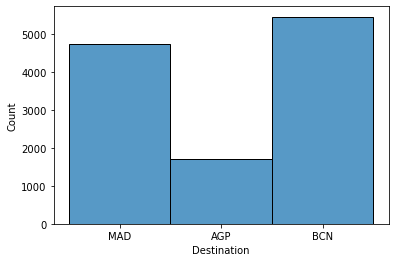

In [159]:
sns.histplot(data=searches['Destination'])

In [160]:
searches['Month']=searches['Date'].str[-5:-3]

In [115]:
searches['Year']=searches['Date'].str[0:4]

In [163]:
 searches['Month'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [149]:
searches['Date']=pd.to_datetime(searches['Date'])
searches['year_Added']=searches['Date'].dt.year
searches['month_Added']=searches['Date'].dt.month

In [196]:
searches

,Date,Time,OfficeID,Destination,TerminalID,Month
4,2013-01-01,17:48:29,1ec336348f44207d2e0027dc3a68c118,MAD,d41d8cd98f00b204e9800998ecf8427e,01
93,2013-01-01,20:15:57,624d8c3ac0b3a7ca03e3c167e0f48327,AGP,d41d8cd98f00b204e9800998ecf8427e,01
113,2013-01-01,23:40:53,0028c46214bc260eb3011510a898cd42,BCN,f024768c26f020e6243423f932c2a4de,01
147,2013-01-01,15:35:53,63d35a15724f95939e6d0dd0ca39be16,AGP,d41d8cd98f00b204e9800998ecf8427e,01
151,2013-01-01,10:46:21,50c54b52322080d2c257390f714f91bd,MAD,d41d8cd98f00b204e9800998ecf8427e,01
...,...,...,...,...,...,...
358894,2013-12-25,00:31:48,1864e5e8013d9414150e91d26b6a558b,MAD,d41d8cd98f00b204e9800998ecf8427e,12
358901,2013-12-25,18:51:20,1b8fcf24b2bacc13c87f1ed4cb6559e0,MAD,d41d8cd98f00b204e9800998ecf8427e,12
358955,2013-12-25,12:55:23,489153b50ba6de99e1dd44d92db2c06b,BCN,d41d8cd98f00b204e9800998ecf8427e,12
358982,2013-12-25,05:04:11,7f8c2d9dfe430c2c6b19298dd7e0ff96,MAD,d41d8cd98f00b204e9800998ecf8427e,12


In [194]:
counter= searches.groupby(['Destination','Month'])['Date'].count()
type(counter)

pandas.core.series.Series

<AxesSubplot:xlabel='Month', ylabel='OfficeID'>

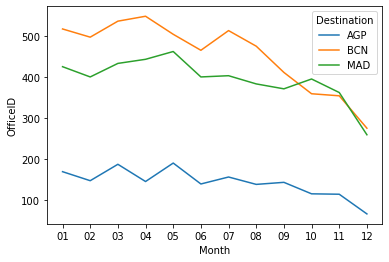

In [200]:
sns.lineplot(data=plot, x='Month', y='OfficeID', hue='Destination')